In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
sns.set(color_codes=True)

In [2]:
train = pd.read_csv('../data/dup/train.csv')
train.head()

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator
0,0,170000,NaN,3089,2798058,293,1,1
1,0,170000,NaN,1259,463234,6161,1,2
2,0,170000,NaN,4465,1857485,7434,4,1
3,0,170000,NaN,1004,2038823,977,1,1
4,0,170000,NaN,1887,2015141,3688,1,1


In [4]:
print train[train['label']==0].shape[0],train[train['label']==1].shape[0]
train[train['label']==0].shape[0]*1.0/train[train['label']==1].shape[0]

3598844 93261


38.58894929284481

In [5]:
3598844*0.1/93261

3.8588949292844816

In [17]:
train.dtypes

label                 int64
clickTime             int64
conversionTime      float64
creativeID            int64
userID                int64
positionID            int64
connectionType        int64
telecomsOperator      int64
adID                  int64
camgaignID            int64
advertiserID          int64
appID                 int64
appPlatform           int64
dtype: object

In [23]:
print 'creativeID',len(pd.unique(train['creativeID']))
print 'userID',len(pd.unique(train['userID']))
print 'positionID',len(pd.unique(train['positionID']))

creativeID 6315
userID 2595627
positionID 7219


In [24]:
ad = pd.read_csv("../data/pre/ad.csv")
train = train.merge(ad,on='creativeID',how='left')
train.head()

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator,adID,camgaignID,advertiserID,appID,appPlatform
0,0,170000,NaN,3089,2798058,293,1,1,1321,83,10,434,1
1,0,170000,NaN,1259,463234,6161,1,2,1535,685,80,14,2
2,0,170000,NaN,4465,1857485,7434,4,1,147,460,3,465,1
3,0,170000,NaN,1004,2038823,977,1,1,411,564,3,465,1
4,0,170000,NaN,1887,2015141,3688,1,1,369,144,84,360,1


In [25]:
print 'appID',len(pd.unique(train['appID']))
print 'camgaignID',len(pd.unique(train['camgaignID']))
print 'appID',len(pd.unique(train['appID']))

appID 50
camgaignID 677
appID 50


In [26]:
train1 = train[train['label']==1]
train0 = train[train['label']==0]

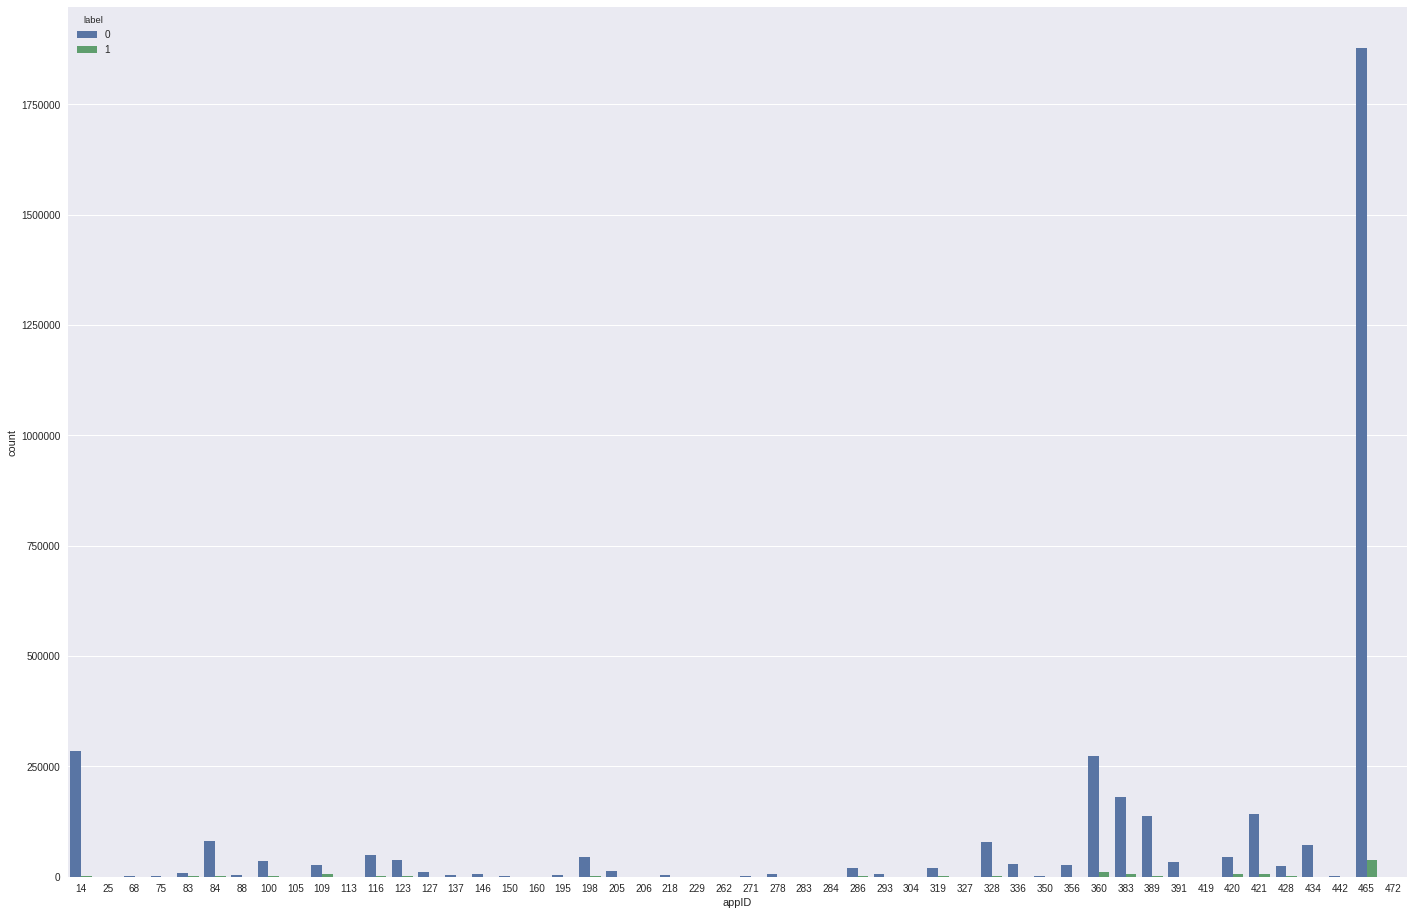

In [56]:
plt.figure(figsize=(24,16))
sns.set(style='darkgrid')
sns.countplot(x='appID',hue='label',data=train)
plt.show()

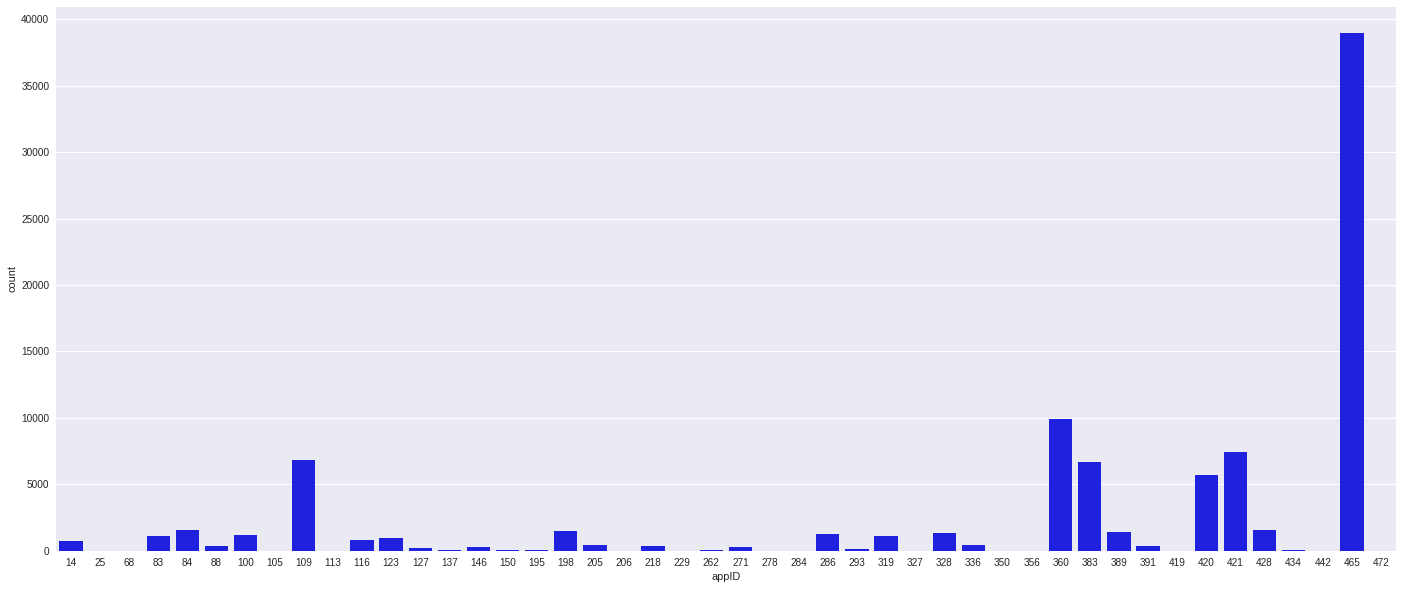

In [50]:
plt.figure(figsize=(24,10))
sns.countplot(x='appID',data=train1,color='b')
plt.show()

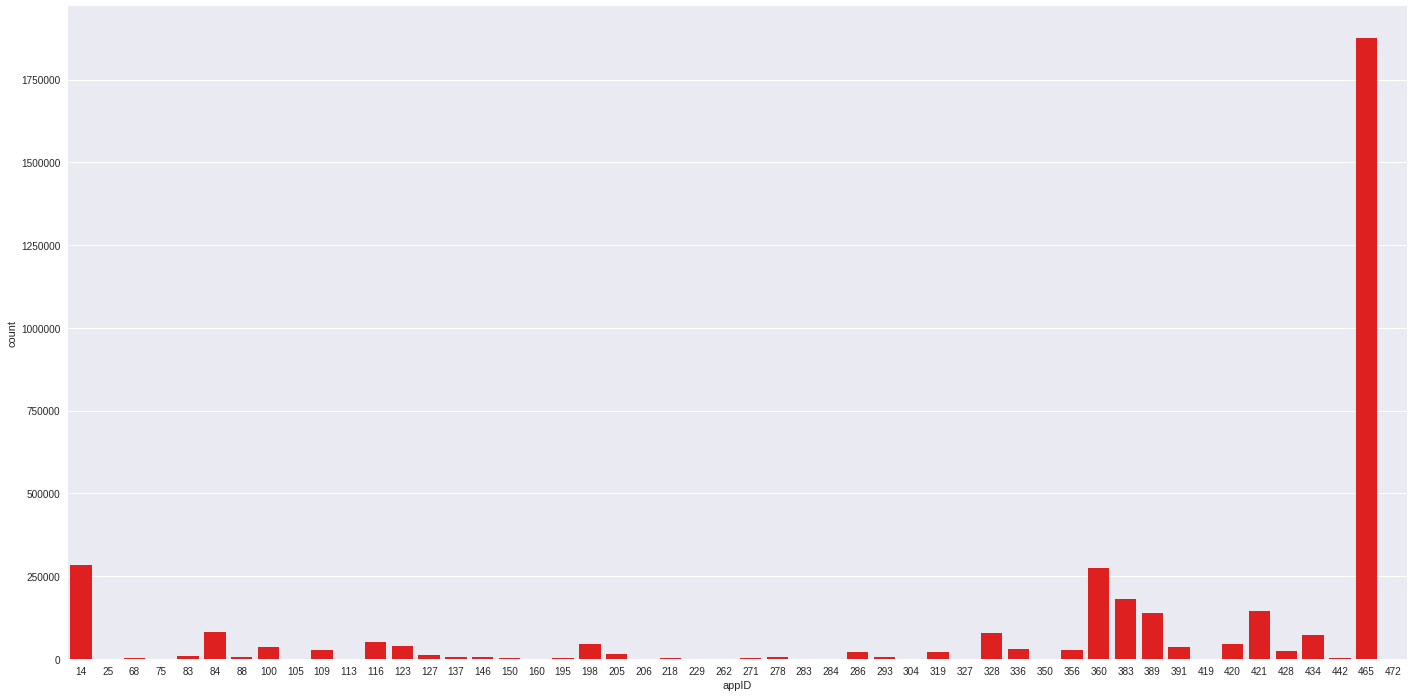

In [51]:
plt.figure(figsize=(24,12))
sns.countplot(x='appID',data=train0,color='r')
plt.show()

In [58]:
train1.head(5)

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator,adID,camgaignID,advertiserID,appID,appPlatform
145,1,170001,181031.0,2137,703736,2579,1,1,2148,179,84,360,1
147,1,170001,170009.0,3981,2030308,2579,2,1,2924,513,44,421,1
187,1,170001,170010.0,3584,936876,3322,2,3,1349,32,8,84,2
191,1,170001,181027.0,2137,2619571,2579,1,2,2148,179,84,360,1
247,1,170001,181031.0,2137,1411484,2579,1,2,2148,179,84,360,1


In [39]:
print 'appID',len(pd.unique(train1['appID']))

appID 46


In [61]:
dd = train1[['userID','label']].groupby('userID',as_index=False).count()
print dd.shape
print dd[dd['label']>1].shape

(92051, 2)
(1076, 2)


In [27]:
train0.head()

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator,adID,camgaignID,advertiserID,appID,appPlatform
0,0,170000,NaN,3089,2798058,293,1,1,1321,83,10,434,1
1,0,170000,NaN,1259,463234,6161,1,2,1535,685,80,14,2
2,0,170000,NaN,4465,1857485,7434,4,1,147,460,3,465,1
3,0,170000,NaN,1004,2038823,977,1,1,411,564,3,465,1
4,0,170000,NaN,1887,2015141,3688,1,1,369,144,84,360,1
